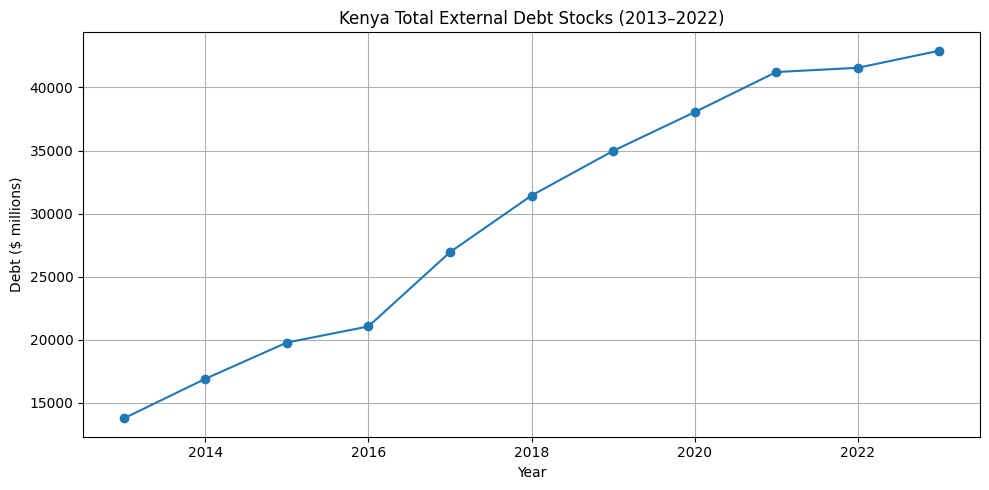

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Local\Temp\ipykernel_5200\2406431358.py:40: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start="2023", periods=forecast_years, freq="Y")


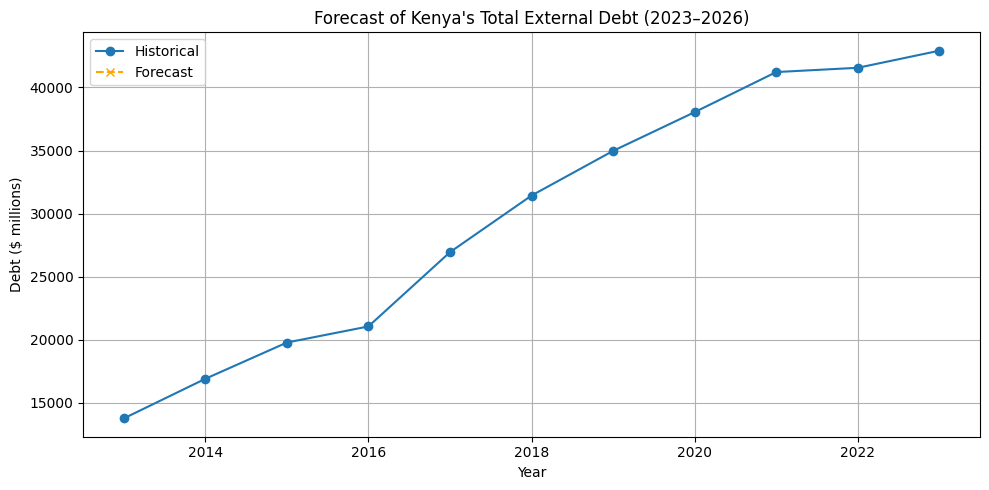

Forecasted External Debt (in $ millions):
2023-12-31   NaN
2024-12-31   NaN
2025-12-31   NaN
2026-12-31   NaN
Freq: YE-DEC, Name: predicted_mean, dtype: float64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Load the dataset
file_path = "Kenya.csv"  # Ensure this CSV file is in your working directory
df = pd.read_csv(file_path)

# Step 2: Clean and structure the dataset
df_cleaned = df.iloc[3:].reset_index(drop=True)
years = df.iloc[0, 1:].tolist()
years = [str(y).strip() for y in years]
indicators = df_cleaned.iloc[:, 0].tolist()

data_values = df_cleaned.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
data_values.columns = years
data_values.index = indicators

# Step 3: Create time series for "Total External debt stocks"
df_time_series = data_values.T
df_time_series.index = pd.to_datetime(df_time_series.index, format="%Y")
ts = df_time_series["Total External debt stocks"].dropna()

# Step 4: Plot the original time series
plt.figure(figsize=(10, 5))
plt.plot(ts, marker='o', linestyle='-')
plt.title("Kenya Total External Debt Stocks (2013–2022)")
plt.xlabel("Year")
plt.ylabel("Debt ($ millions)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Fit ARIMA model and forecast future values
model = ARIMA(ts, order=(1, 1, 1))  # You can tune (p,d,q) for better results
model_fit = model.fit()

forecast_years = 4  # Predict for 2023–2026
forecast = model_fit.forecast(steps=forecast_years)
future_years = pd.date_range(start="2023", periods=forecast_years, freq="Y")
forecast_series = pd.Series(forecast, index=future_years)

# Step 6: Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(ts, label="Historical", marker='o')
plt.plot(forecast_series, label="Forecast", marker='x', linestyle='--', color='orange')
plt.title("Forecast of Kenya's Total External Debt (2023–2026)")
plt.xlabel("Year")
plt.ylabel("Debt ($ millions)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Print forecasted values
print("Forecasted External Debt (in $ millions):")
print(forecast_series)

